## 5. Lemmatization - Sentiment Analysis 

In [7]:
import spacy
import gensim
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd 
import numpy as np 
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import pandas as pd
import collections
from sklearn import preprocessing
from sklearn import metrics
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc

import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy import sparse
%matplotlib inline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\liewm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
df=pd.read_csv(r'C:\Users\liewm\Documents\BT4222 Mining Web Data\Project\hotel.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head(2)

,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Positive_Review,Reviewer_Score,Tags,lat,lng,cleaned_pos,cleaned_neg,cleaned_combine
0,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968,park hotel beautiful,angry make post available possible site use pl...,park hotel beautiful angry make post available...
1,7.7,Hotel Arena,Ireland,No Negative,No real complaints the hotel was great great ...,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",52.360576,4.915968,real complaint hotel great great location surr...,NaN,real complaint hotel great great location surr...


In [6]:
new_data=pd.DataFrame()
new_data['Stemming']=df1.Stem_Summary
new_data['Lemmatization']=df.cleaned_combine
new_data.head()

,Stemming,Lemmatization
0,only park outside hotel beauti,park hotel beautiful angry make post available...
1,no real complaints hotel great great location...,real complaint hotel great great location surr...
2,location good staff ok it cute hotel breakfas...,location good staff cute hotel breakfast range...
3,great location nice surroundings bar restaura...,great location nice surrounding bar restaurant...
4,amazing location building romantic set,amazing location building romantic setting boo...


In [10]:
import numpy as np
df = df.replace(np.nan, '', regex=True)
df.isnull().any()

Average_Score           False
Hotel_Name              False
Reviewer_Nationality    False
Negative_Review         False
Positive_Review         False
Reviewer_Score          False
Tags                    False
lat                     False
lng                     False
cleaned_pos             False
cleaned_neg             False
cleaned_combine         False
dtype: bool

In [11]:
#loading the positive reviews and negative reviews to a single column as text
pos_reviews = df['cleaned_pos'].values
pos_reviews = pos_reviews.tolist()
neg_reviews = df['cleaned_neg'].values
neg_reviews = neg_reviews.tolist()
text = pos_reviews+neg_reviews

In [12]:
#providing score attribute to the review
score = ['positive' for i in range(len(pos_reviews))]
score += ['negative' for i in range(len(neg_reviews))]
#performing one-hot encoding to the score attrubute.(1- positive and 0- negative)
for i in range(0,len(score)):
    if score[i] == 'positive':
        score[i] = 1
    else:
        score[i] = 0

In [13]:
#loading required data to dataframe.
text_df = pd.DataFrame()
text_df['reviews'] = text
text_df['score'] = score
text_df.head()

,reviews,score
0,park hotel beautiful,1
1,real complaint hotel great great location surr...,1
2,location good staff cute hotel breakfast range...,1
3,great location nice surrounding bar restaurant...,1
4,amazing location building romantic setting,1


## 5.1 Preparation for algo
- Split dataset to training and testing dataset 
- Function for tfidf

In [14]:
from sklearn.model_selection import train_test_split
df=text_df
SEED = 1
x=df.reviews
y=df.score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [15]:
def tfidf(col,ngrams, num):

    df_temp = df.copy(deep = True)
    tfidf_vectorizer = TfidfVectorizer(max_features=num, ngram_range=(1, ngrams))
    tfidf_vectorizer.fit(df_temp[col])

    list_corpus = df_temp[col].tolist()
    list_labels = df_temp['score'].tolist()

    X = tfidf_vectorizer.transform(list_corpus)
    
    return X, list_labels

## 5.2 Models 
### 5.2.1 Logistic Regression 
- Feature : Bigram tf-idf vectorizer (100,000 features)

In [19]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

def training_logreg(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)
    
    clf = LogisticRegressionCV(cv = folds, solver = 'saga', multi_class = 'ovr', n_jobs = -1)
    
    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_pred_training, y_train_log)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Logistic Regression', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

Confusion matrix:
 [[97745  4999]
 [13515 89826]]


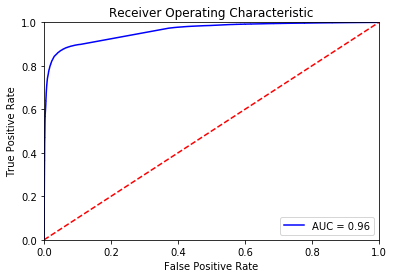

In [20]:
# DataFrame for result evaluation

lr_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

# Testing TF-IDF with 2-gram

X, y = tfidf('reviews', ngrams = 2, num=100000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
lr_result = lr_result.append(training_logreg(X_train, X_test, y_train, y_test, 'TF-IDF 2-grams'), ignore_index = True)


In [21]:
lr_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 2-grams,Logistic Regression,0.913557,0.910163,0.910306,0.910163,0.921229


### 5.2.2 Multinomial Naive Bayes 
- Trigram tfidf vectorizer

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
params = {}
def training_NB(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 40)
    nb = MultinomialNB()
    clf = GridSearchCV(nb, param_grid=params,cv=folds)
    
    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_pred, y_test_log, average = 'weighted')
    pres = precision_score(y_pred, y_test_log, average = 'weighted')
    rec = recall_score(y_pred, y_test_log, average = 'weighted')
    acc = accuracy_score(y_pred, y_test_log)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_pred_training, y_train_log)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Naive Bayes', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

Confusion matrix:
 [[97295  5449]
 [14846 88495]]


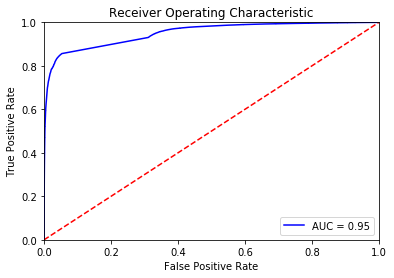

In [23]:
# DataFrame for result evaluation

nb_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

# Testing TF-IDF with 3-gram

X, y = tfidf('reviews', ngrams = 3, num=100000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
nb_result = nb_result.append(training_NB(X_train, X_test, y_train, y_test, 'TF-IDF 3-grams'), ignore_index = True)


In [24]:
nb_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 3-grams,Naive Bayes,0.905654,0.901521,0.901713,0.901521,0.904686


### 5.2.3 Random Forest 
- TFIDF Bigram 70,000 features

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
params = {}
def training_RF(X_train_log, X_test_log, y_train_log, y_test_log, preproc):
    
    
    clf = RandomForestClassifier()
    
    clf.fit(X_train_log, y_train_log)

    res = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])
    
    y_pred_training=clf.predict(X_train_log)
    y_pred = clf.predict(X_test_log)
    
    f1 = f1_score(y_test_log, y_pred)
    pres = precision_score(y_test_log, y_pred)
    rec = recall_score(y_test_log, y_pred)
    acc = accuracy_score(y_test_log, y_pred)#compare output of x_test prediction with actual output 
    training_acc=accuracy_score(y_train_log, y_pred_training)#compare output of x_train with y_train 

    res = res.append({'Preprocessing': preproc, 'Model': f'Naive Bayes', 'Precision': pres, 
                     'Recall': rec, 'F1-score': f1, 'Testing Accuracy': acc, 'Training Accuracy':training_acc}, ignore_index = True)
    
    
    #Confusion matrix 
    conf_NB = confusion_matrix(y_test_log, y_pred)    

    print("Confusion matrix:\n",conf_NB)
    
    # Plot ROC curve
    preds=clf.predict_proba(X_test_log)[:,1]
    fpr, tpr, threshold = roc_curve(y_test_log, preds)
    roc_auc = auc(fpr, tpr)
    
    #Plot ROC

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    return res

Confusion matrix:
 [[96472  6272]
 [15115 88226]]


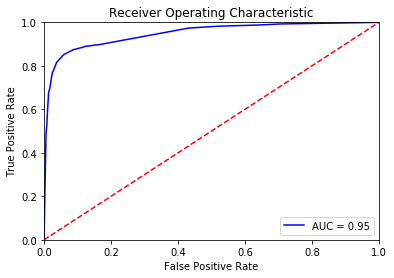

In [18]:
# DataFrame for result evaluation
from sklearn.model_selection import train_test_split
rf_result = pd.DataFrame(columns = ['Preprocessing', 'Model', 'Precision', 'Recall', 'F1-score', 'Testing Accuracy', 'Training Accuracy'])

X, y = tfidf('reviews', ngrams = 2, num=70000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
rf_result = rf_result.append(training_RF(X_train, X_test, y_train, y_test, 'TF-IDF 2-grams'), ignore_index = True)


In [19]:
rf_result

,Preprocessing,Model,Precision,Recall,F1-score,Testing Accuracy,Training Accuracy
0,TF-IDF 2-grams,Naive Bayes,0.933628,0.853737,0.891897,0.896222,0.945348
